In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#First working on the scaled and quantified data. 

In [3]:
Drugs = pd.read_csv('../input/drug-consumptions-uci/Drug_Consumption_Quantified.csv',header=None)
Drugs.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
#Data inspection and cleaning 

In [5]:
Drugs.columns = ['ID','Age (Real)','Gender (Real)','Education (Real)','Country (Real)','Ethnicity (Real)','Nscore (Real)','Escore (Real)','Oscore (Real)','Ascore (Real)','Cscore (Real)','Impulsive (Real)','SS (Real)','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']

In [6]:
Drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1885 non-null   object
 1   Age (Real)        1885 non-null   object
 2   Gender (Real)     1885 non-null   object
 3   Education (Real)  1885 non-null   object
 4   Country (Real)    1885 non-null   object
 5   Ethnicity (Real)  1885 non-null   object
 6   Nscore (Real)     1885 non-null   object
 7   Escore (Real)     1885 non-null   object
 8   Oscore (Real)     1885 non-null   object
 9   Ascore (Real)     1885 non-null   object
 10  Cscore (Real)     1885 non-null   object
 11  Impulsive (Real)  1885 non-null   object
 12  SS (Real)         1885 non-null   object
 13  Alcohol           1885 non-null   object
 14  Amphet            1885 non-null   object
 15  Amyl              1885 non-null   object
 16  Benzos            1885 non-null   object
 17  Caff          

In [7]:
Drugs.drop('ID',axis=1,inplace=True)
Drugs.head()

,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),Cscore (Real),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,-1.0145,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
temp = Drugs.columns
temp = temp[12:]
for i in temp:
    Drugs[i] = Drugs[i].map({'CL0':0,'CL1':1,'CL2':2,'CL3':3,'CL4':4,'CL5':5,'CL6':6})

In [9]:
Drugs.head()

,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real),Escore (Real),Oscore (Real),Ascore (Real),Cscore (Real),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0,0.0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.6209,-1.0145,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.6334,-0.45174,-0.30172,1.30612,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0


In [10]:
Drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age (Real)        1885 non-null   object 
 1   Gender (Real)     1885 non-null   object 
 2   Education (Real)  1885 non-null   object 
 3   Country (Real)    1885 non-null   object 
 4   Ethnicity (Real)  1885 non-null   object 
 5   Nscore (Real)     1885 non-null   object 
 6   Escore (Real)     1885 non-null   object 
 7   Oscore (Real)     1885 non-null   object 
 8   Ascore (Real)     1885 non-null   object 
 9   Cscore (Real)     1885 non-null   object 
 10  Impulsive (Real)  1885 non-null   object 
 11  SS (Real)         1885 non-null   object 
 12  Alcohol           1884 non-null   float64
 13  Amphet            1884 non-null   float64
 14  Amyl              1884 non-null   float64
 15  Benzos            1884 non-null   float64
 16  Caff              1884 non-null   float64


In [11]:
#EDA

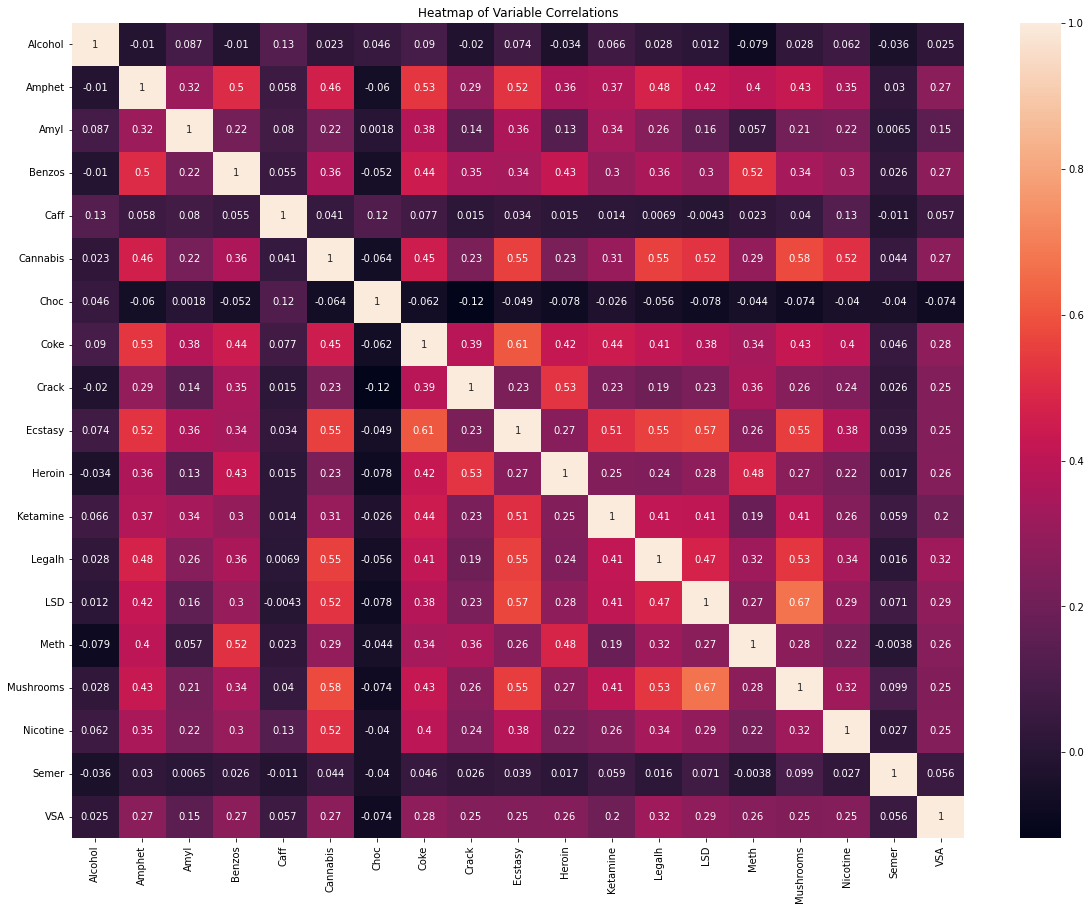

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(Drugs.drop(['Age (Real)','Gender (Real)','Education (Real)','Country (Real)','Ethnicity (Real)'],axis=1).corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [13]:
#As we can see an Openess to experience has higher correlations with drug us. 
#Conscientiousness has mostly negative coreelations with most drug use as expected. 
#The next highest persona trait that has correlations with drug use on a broad scale is Neuroticism. 
#Implusiveness and Sensation seeing are also high predictors of drug use. 

#Neurotics have correlations with the drugs benzos and meth.
#Openess has high correlations with cannabis, LSD and mushrooms. 
#Conscientiousness has the lowest negative correlations with Achohol and chocolate and highest negative correlations 
#with Cannabis, amphet, legal highs and Nicotine. 

#Between the drugs themseves there are correlations. 
#High correlations of LSD with mushrooms, coke and ecstasy, mushrooms and cannabis. 

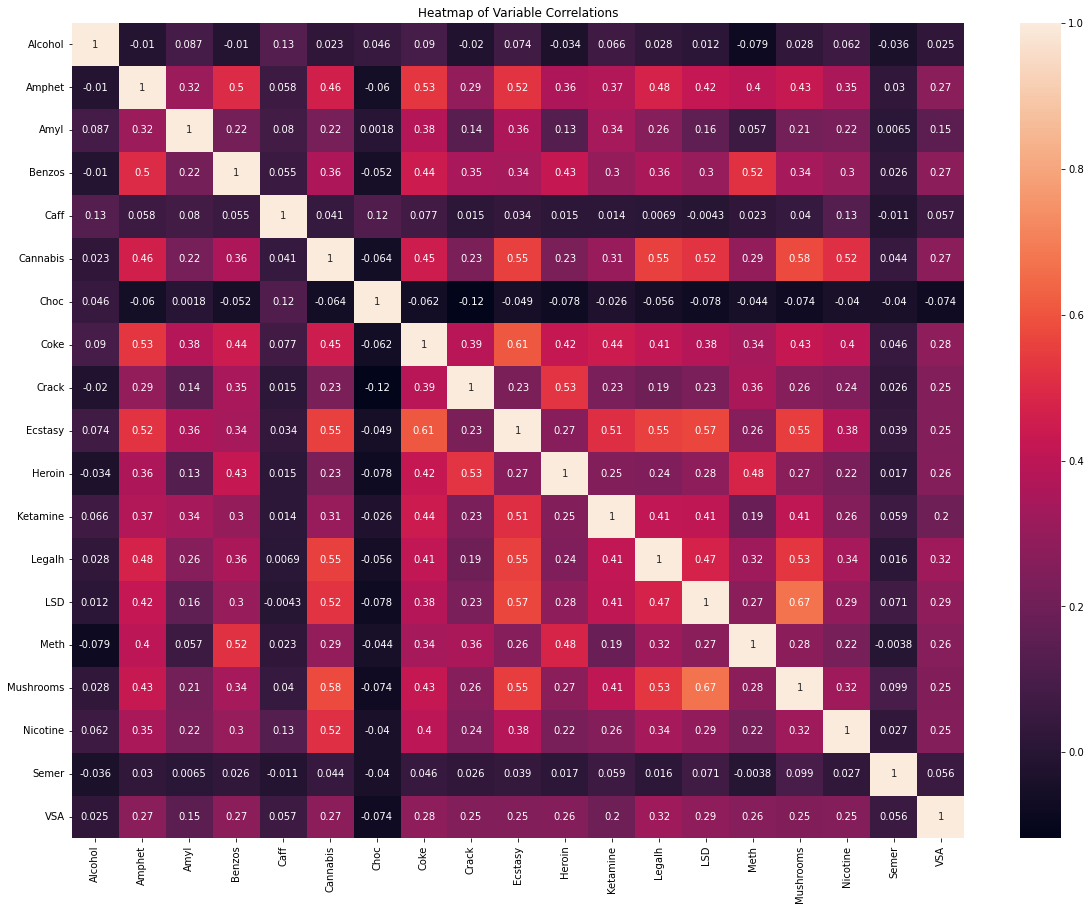

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(Drugs.drop(['Nscore (Real)','Escore (Real)','Oscore (Real)','Ascore (Real)','Cscore (Real)','Impulsive (Real)','SS (Real)'],axis=1).corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [15]:
#Age has high negative correlations with legal highs, cannabis and ecstasy. 
#Gender(male<female) has negative correlations with most drug use especially legal highs and cannabis. 
#Education has 1 positive correlation with achohol and negative correlations with cannabis and nicotine. 

#These were the only ordered categorical variables present. 

In [16]:
#Plotting only a correlation heatmap since the vairables have been scaled and hence nothing can be intepreted from the plots 
#except correlations. 

In [17]:
#Now working on the un quantified data. 

In [18]:
Drugs = pd.read_csv('../input/drug-consumptions-uci/Drug_Consumption.csv')
Drugs.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [19]:
#Data inspection and cleaning 

In [20]:
Drugs.drop('ID',axis=1,inplace=True)
Drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   object 
 1   Gender     1884 non-null   object 
 2   Education  1884 non-null   object 
 3   Country    1884 non-null   object 
 4   Ethnicity  1884 non-null   object 
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   AScore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   object 
 13  Amphet     1884 non-null   object 
 14  Amyl       1884 non-null   object 
 15  Benzos     1884 non-null   object 
 16  Caff       1884 non-null   object 
 17  Cannabis   1884 non-null   object 
 18  Choc       1884 non-null   object 
 19  Coke       1884 non-null   object 
 20  Crack   

In [21]:
#Converting the 'CL' categorical variables into a cumulative probability of regular use based on most recent case of use. 
#This might help model building.

In [22]:
temp = Drugs.columns
temp = temp[12:]
for i in temp:
    Drugs[i] = Drugs[i].map({'CL0':0,'CL1':1/6,'CL2':2/6,'CL3':3/6,'CL4':4/6,'CL5':5/6,'CL6':6/6})

In [23]:
Drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   object 
 1   Gender     1884 non-null   object 
 2   Education  1884 non-null   object 
 3   Country    1884 non-null   object 
 4   Ethnicity  1884 non-null   object 
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   AScore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   float64
 13  Amphet     1884 non-null   float64
 14  Amyl       1884 non-null   float64
 15  Benzos     1884 non-null   float64
 16  Caff       1884 non-null   float64
 17  Cannabis   1884 non-null   float64
 18  Choc       1884 non-null   float64
 19  Coke       1884 non-null   float64
 20  Crack   

In [24]:
#EDA

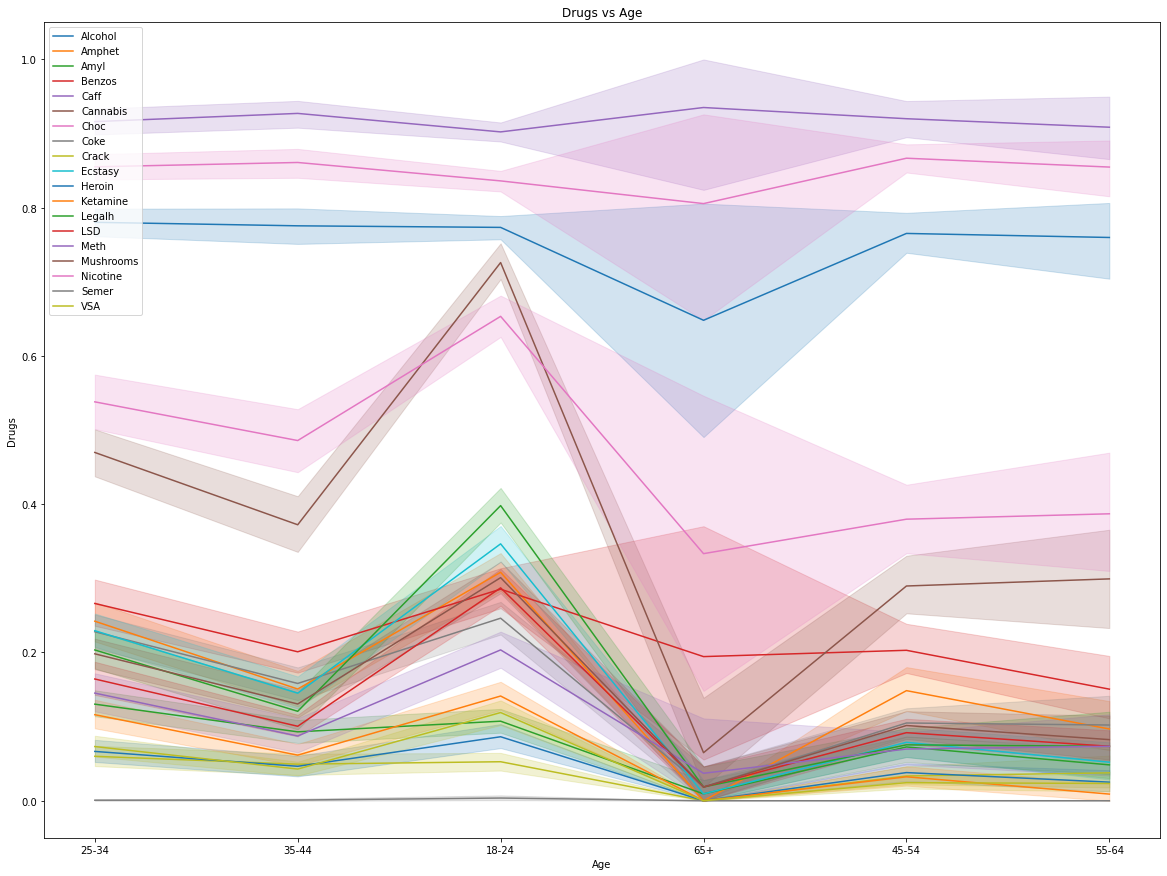

In [25]:
plt.figure(figsize=(20,15))
sns.lineplot(Drugs.Age, Drugs.Alcohol, label='Alcohol')
sns.lineplot(Drugs.Age, Drugs.Amphet, label='Amphet')
sns.lineplot(Drugs.Age, Drugs.Amyl, label='Amyl')
sns.lineplot(Drugs.Age, Drugs.Benzos, label='Benzos')
sns.lineplot(Drugs.Age, Drugs.Caff, label='Caff')
sns.lineplot(Drugs.Age, Drugs.Cannabis, label='Cannabis')
sns.lineplot(Drugs.Age, Drugs.Choc, label='Choc')
sns.lineplot(Drugs.Age, Drugs.Coke, label='Coke')
sns.lineplot(Drugs.Age, Drugs.Crack, label='Crack')
sns.lineplot(Drugs.Age, Drugs.Ecstasy, label='Ecstasy')
sns.lineplot(Drugs.Age, Drugs.Heroin, label='Heroin')
sns.lineplot(Drugs.Age, Drugs.Ketamine, label='Ketamine')
sns.lineplot(Drugs.Age, Drugs.Legalh, label='Legalh')
sns.lineplot(Drugs.Age, Drugs.LSD, label='LSD')
sns.lineplot(Drugs.Age, Drugs.Meth, label='Meth')
sns.lineplot(Drugs.Age, Drugs.Mushrooms, label='Mushrooms')
sns.lineplot(Drugs.Age, Drugs.Nicotine, label='Nicotine')
sns.lineplot(Drugs.Age, Drugs.Semer, label='Semer')
sns.lineplot(Drugs.Age, Drugs.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Age')
plt.xlabel('Age')
plt.ylabel('Drugs')
plt.show()

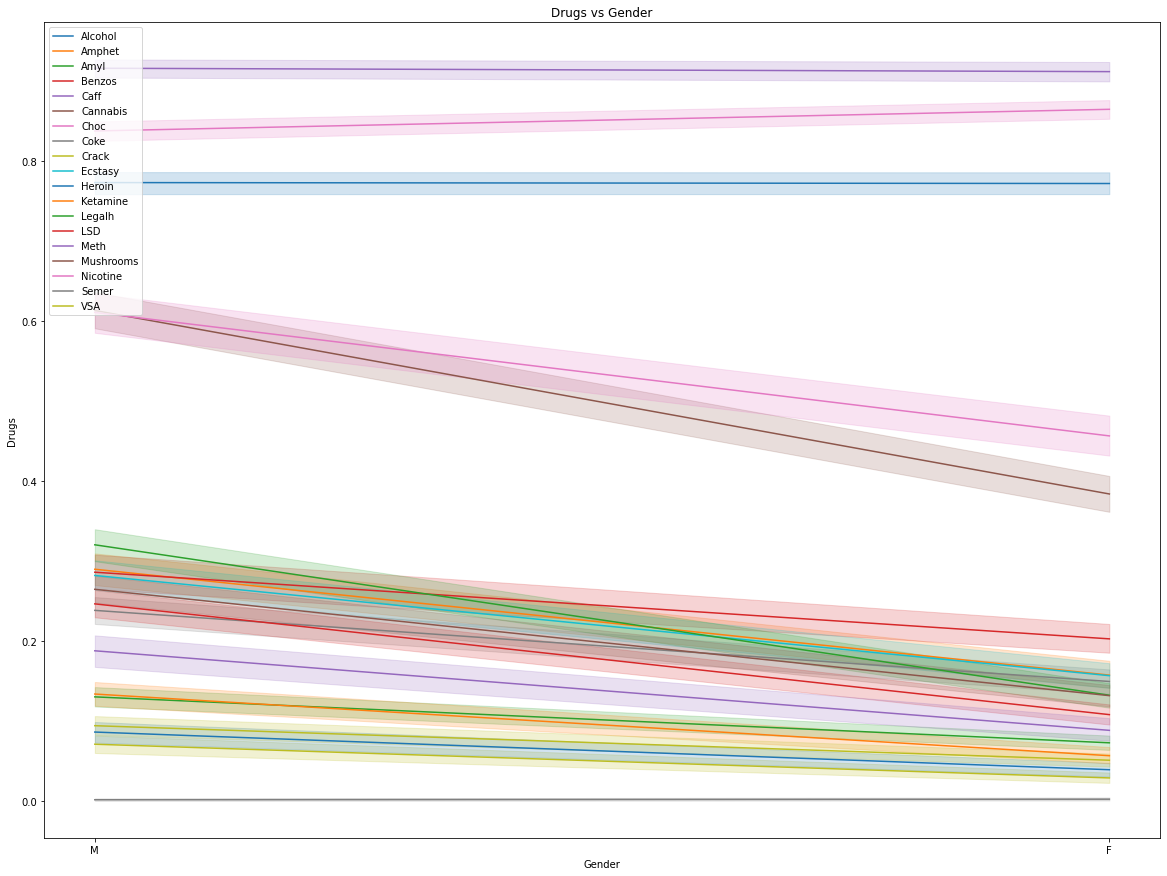

In [26]:
plt.figure(figsize=(20,15))
sns.lineplot(Drugs.Gender, Drugs.Alcohol, label='Alcohol')
sns.lineplot(Drugs.Gender, Drugs.Amphet, label='Amphet')
sns.lineplot(Drugs.Gender, Drugs.Amyl, label='Amyl')
sns.lineplot(Drugs.Gender, Drugs.Benzos, label='Benzos')
sns.lineplot(Drugs.Gender, Drugs.Caff, label='Caff')
sns.lineplot(Drugs.Gender, Drugs.Cannabis, label='Cannabis')
sns.lineplot(Drugs.Gender, Drugs.Choc, label='Choc')
sns.lineplot(Drugs.Gender, Drugs.Coke, label='Coke')
sns.lineplot(Drugs.Gender, Drugs.Crack, label='Crack')
sns.lineplot(Drugs.Gender, Drugs.Ecstasy, label='Ecstasy')
sns.lineplot(Drugs.Gender, Drugs.Heroin, label='Heroin')
sns.lineplot(Drugs.Gender, Drugs.Ketamine, label='Ketamine')
sns.lineplot(Drugs.Gender, Drugs.Legalh, label='Legalh')
sns.lineplot(Drugs.Gender, Drugs.LSD, label='LSD')
sns.lineplot(Drugs.Gender, Drugs.Meth, label='Meth')
sns.lineplot(Drugs.Gender, Drugs.Mushrooms, label='Mushrooms')
sns.lineplot(Drugs.Gender, Drugs.Nicotine, label='Nicotine')
sns.lineplot(Drugs.Gender, Drugs.Semer, label='Semer')
sns.lineplot(Drugs.Gender, Drugs.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Gender')
plt.xlabel('Gender')
plt.ylabel('Drugs')
plt.show()

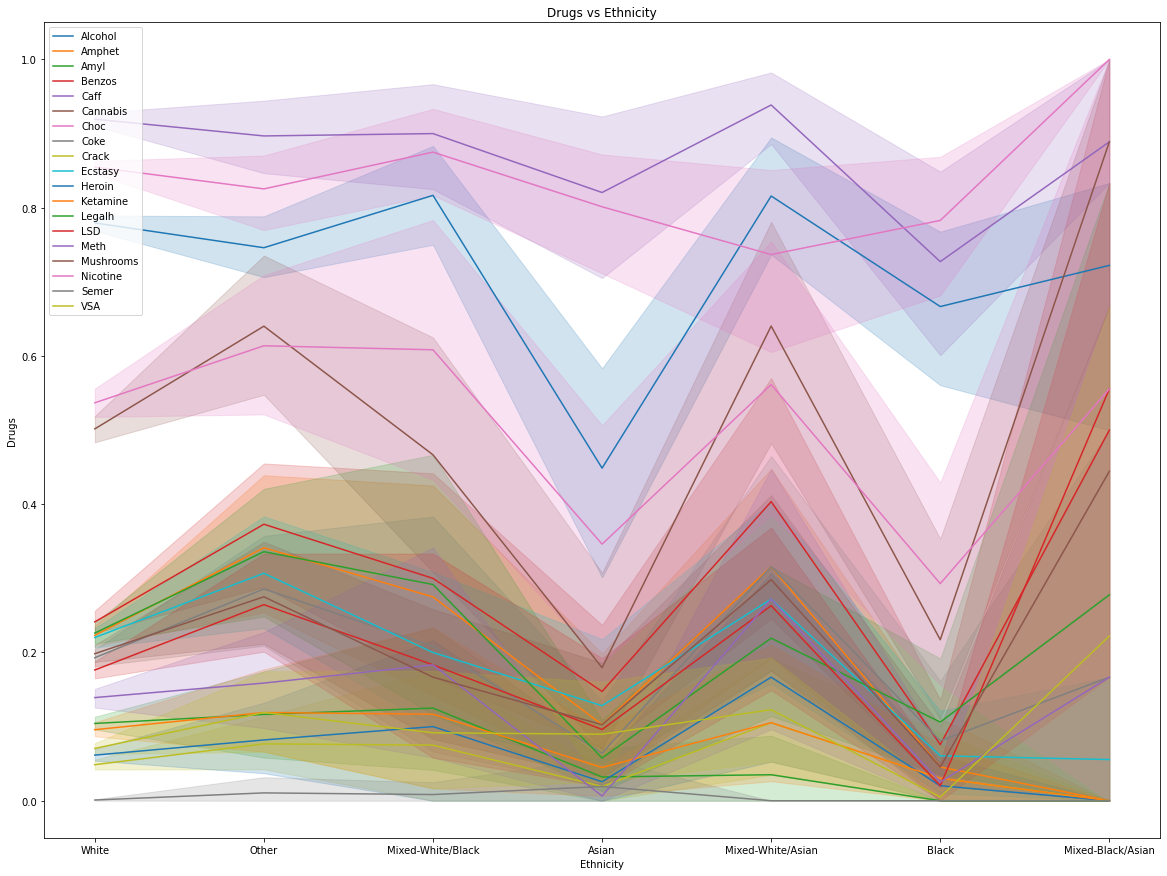

In [27]:
plt.figure(figsize=(20,15))
sns.lineplot(Drugs.Ethnicity, Drugs.Alcohol, label='Alcohol')
sns.lineplot(Drugs.Ethnicity, Drugs.Amphet, label='Amphet')
sns.lineplot(Drugs.Ethnicity, Drugs.Amyl, label='Amyl')
sns.lineplot(Drugs.Ethnicity, Drugs.Benzos, label='Benzos')
sns.lineplot(Drugs.Ethnicity, Drugs.Caff, label='Caff')
sns.lineplot(Drugs.Ethnicity, Drugs.Cannabis, label='Cannabis')
sns.lineplot(Drugs.Ethnicity, Drugs.Choc, label='Choc')
sns.lineplot(Drugs.Ethnicity, Drugs.Coke, label='Coke')
sns.lineplot(Drugs.Ethnicity, Drugs.Crack, label='Crack')
sns.lineplot(Drugs.Ethnicity, Drugs.Ecstasy, label='Ecstasy')
sns.lineplot(Drugs.Ethnicity, Drugs.Heroin, label='Heroin')
sns.lineplot(Drugs.Ethnicity, Drugs.Ketamine, label='Ketamine')
sns.lineplot(Drugs.Ethnicity, Drugs.Legalh, label='Legalh')
sns.lineplot(Drugs.Ethnicity, Drugs.LSD, label='LSD')
sns.lineplot(Drugs.Ethnicity, Drugs.Meth, label='Meth')
sns.lineplot(Drugs.Ethnicity, Drugs.Mushrooms, label='Mushrooms')
sns.lineplot(Drugs.Ethnicity, Drugs.Nicotine, label='Nicotine')
sns.lineplot(Drugs.Ethnicity, Drugs.Semer, label='Semer')
sns.lineplot(Drugs.Ethnicity, Drugs.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Drugs')
plt.show()

In [28]:
#As we can see these plots are very chaotic and nothing of importance can be obtained from them. 

In [29]:
Drugs['Education'].value_counts()

Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: Education, dtype: int64

In [30]:
Drugs['Age'] = Drugs['Age'].map({'18-24':1,'25-34':2,'35-44':3,'45-54':4,'55-64':5,'65+':6})
Drugs['Gender'] = Drugs['Gender'].map({'M':1,'F':0})
Drugs['Education'] = Drugs['Education'].map({'Left school before 16 years':1,'Left school at 16 years':2,'Left school at 17 years':3,'Left school at 18 years':4,'Some college or university, no certificate or degree':5,'Professional certificate/ diploma':6,'University degree':7,'Masters degree':8,'Doctorate degree':9})

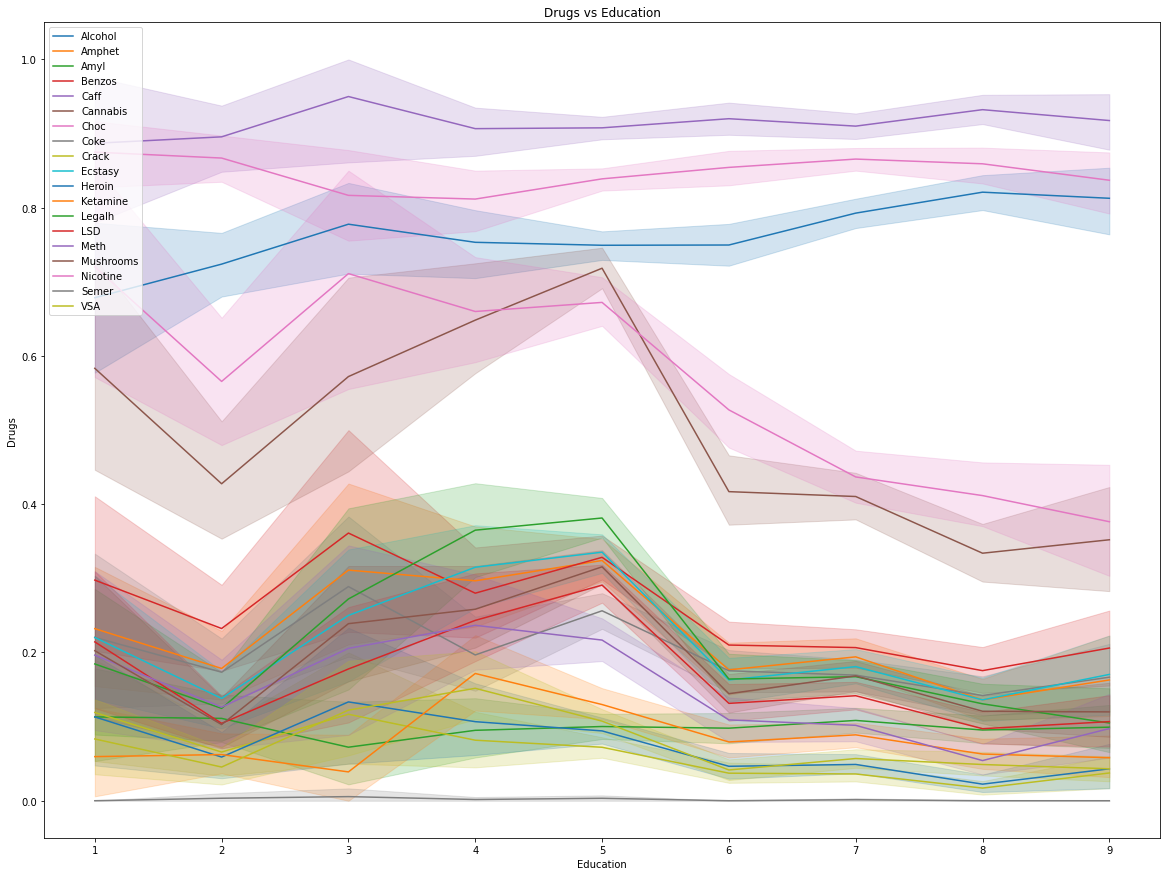

In [31]:
plt.figure(figsize=(20,15))
sns.lineplot(Drugs.Education, Drugs.Alcohol, label='Alcohol')
sns.lineplot(Drugs.Education, Drugs.Amphet, label='Amphet')
sns.lineplot(Drugs.Education, Drugs.Amyl, label='Amyl')
sns.lineplot(Drugs.Education, Drugs.Benzos, label='Benzos')
sns.lineplot(Drugs.Education, Drugs.Caff, label='Caff')
sns.lineplot(Drugs.Education, Drugs.Cannabis, label='Cannabis')
sns.lineplot(Drugs.Education, Drugs.Choc, label='Choc')
sns.lineplot(Drugs.Education, Drugs.Coke, label='Coke')
sns.lineplot(Drugs.Education, Drugs.Crack, label='Crack')
sns.lineplot(Drugs.Education, Drugs.Ecstasy, label='Ecstasy')
sns.lineplot(Drugs.Education, Drugs.Heroin, label='Heroin')
sns.lineplot(Drugs.Education, Drugs.Ketamine, label='Ketamine')
sns.lineplot(Drugs.Education, Drugs.Legalh, label='Legalh')
sns.lineplot(Drugs.Education, Drugs.LSD, label='LSD')
sns.lineplot(Drugs.Education, Drugs.Meth, label='Meth')
sns.lineplot(Drugs.Education, Drugs.Mushrooms, label='Mushrooms')
sns.lineplot(Drugs.Education, Drugs.Nicotine, label='Nicotine')
sns.lineplot(Drugs.Education, Drugs.Semer, label='Semer')
sns.lineplot(Drugs.Education, Drugs.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Education')
plt.xlabel('Education')
plt.ylabel('Drugs')
plt.show()

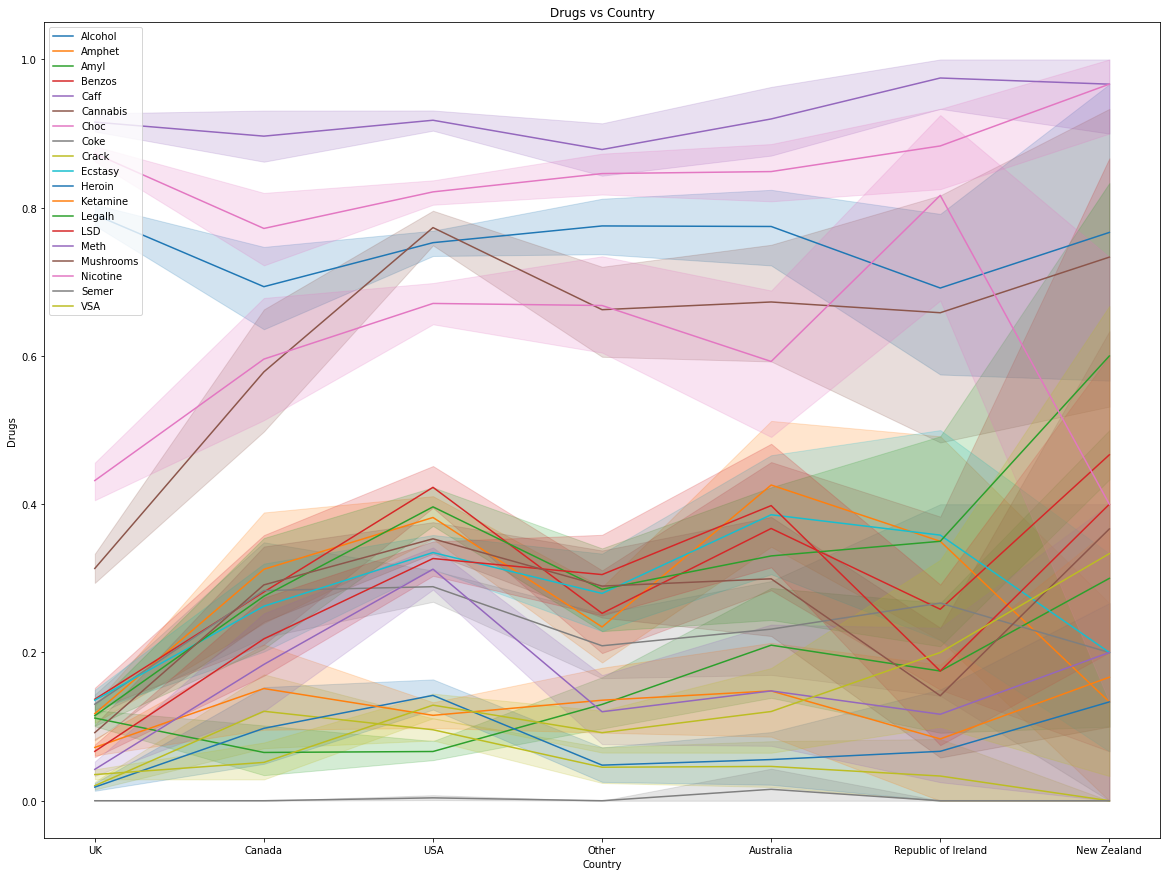

In [32]:
plt.figure(figsize=(20,15))
sns.lineplot(Drugs.Country, Drugs.Alcohol, label='Alcohol')
sns.lineplot(Drugs.Country, Drugs.Amphet, label='Amphet')
sns.lineplot(Drugs.Country, Drugs.Amyl, label='Amyl')
sns.lineplot(Drugs.Country, Drugs.Benzos, label='Benzos')
sns.lineplot(Drugs.Country, Drugs.Caff, label='Caff')
sns.lineplot(Drugs.Country, Drugs.Cannabis, label='Cannabis')
sns.lineplot(Drugs.Country, Drugs.Choc, label='Choc')
sns.lineplot(Drugs.Country, Drugs.Coke, label='Coke')
sns.lineplot(Drugs.Country, Drugs.Crack, label='Crack')
sns.lineplot(Drugs.Country, Drugs.Ecstasy, label='Ecstasy')
sns.lineplot(Drugs.Country, Drugs.Heroin, label='Heroin')
sns.lineplot(Drugs.Country, Drugs.Ketamine, label='Ketamine')
sns.lineplot(Drugs.Country, Drugs.Legalh, label='Legalh')
sns.lineplot(Drugs.Country, Drugs.LSD, label='LSD')
sns.lineplot(Drugs.Country, Drugs.Meth, label='Meth')
sns.lineplot(Drugs.Country, Drugs.Mushrooms, label='Mushrooms')
sns.lineplot(Drugs.Country, Drugs.Nicotine, label='Nicotine')
sns.lineplot(Drugs.Country, Drugs.Semer, label='Semer')
sns.lineplot(Drugs.Country, Drugs.VSA, label='VSA')
plt.legend(loc='upper left')
plt.title('Drugs vs Country')
plt.xlabel('Country')
plt.ylabel('Drugs')
plt.show()

In [33]:
drugs = list(Drugs.columns)[12:31]
len(drugs)

19

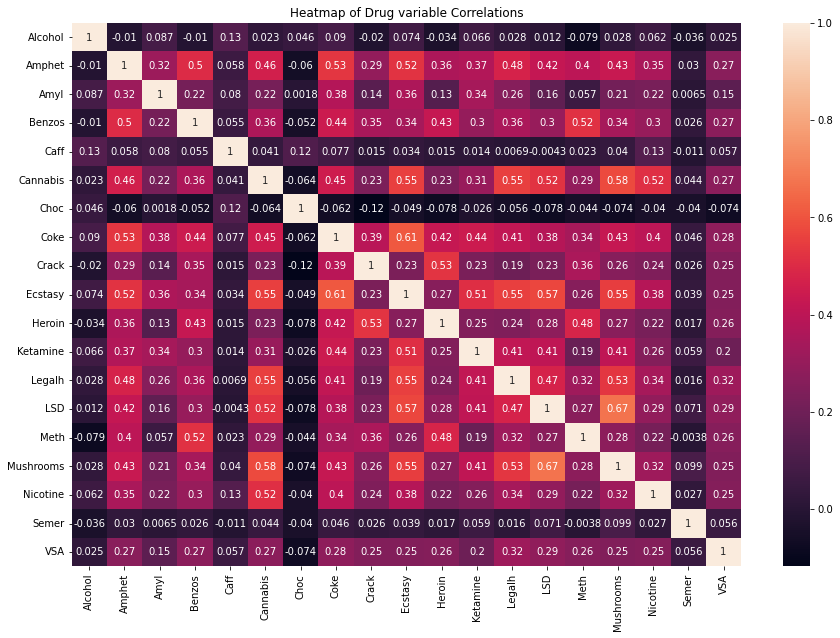

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(Drugs[drugs].corr(),annot=True)
plt.title('Heatmap of Drug variable Correlations')
plt.show()

In [35]:
#Model building

In [36]:
#We will be building different models for difference drugs types using the same set of independent variables. 

In [37]:
#First we will convert the probability based target variables into categorical variables by binning them into 2 categories. 
#Have tried using regression model to model the probablistic data earlier and was not sucessfull. 

In [38]:
Drugs[drugs].describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.772470,0.223372,0.101203,0.244161,0.913924,0.498496,0.851115,0.193648,0.049628,0.219126,0.062367,0.094922,0.226115,0.177017,0.137827,0.197983,0.533528,0.001592,0.072275
std,0.221930,0.297333,0.177400,0.311288,0.185813,0.381168,0.181600,0.252199,0.139541,0.274621,0.172503,0.203378,0.298308,0.248550,0.274493,0.244413,0.402402,0.026562,0.160430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.000000,0.000000,0.833333,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
50%,0.833333,0.000000,0.000000,0.000000,1.000000,0.500000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
75%,1.000000,0.333333,0.166667,0.500000,1.000000,0.833333,1.000000,0.333333,0.000000,0.500000,0.000000,0.000000,0.500000,0.333333,0.000000,0.333333,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000


In [39]:
Drugs_Prediction = Drugs.copy()
drugs.remove('Semer')
for i in drugs:
    Drugs_Prediction[i] = Drugs_Prediction[i].apply(lambda x: 1 if x>=0.833 else 0)
drugs = drugs+['Semer']
Drugs_Prediction['Semer'] = Drugs_Prediction['Semer'].apply(lambda x: 1 if x>=0.5 else 0)
Drugs_Prediction[drugs].head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Semer
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
len(drugs)

19

In [41]:
#We have chosen a cutoff of 0.66 as corresponding the having done the drug in the last week. For the drug Semer however we have 
#choosen a cutoff of 0.5 since the highest values in that variable are very low. 

In [42]:
Drugs_Prediction.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,1,9,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,0,0,0,0,0,0,0,0,0
1,3,1,6,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,0,0,0
2,1,0,8,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,0,0,0,0,0,0,0
3,3,0,9,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,0,0,0,0,0,0,0,0
4,6,0,4,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,1,0,0


In [43]:
Drugs_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   int64  
 1   Gender     1884 non-null   int64  
 2   Education  1884 non-null   int64  
 3   Country    1884 non-null   object 
 4   Ethnicity  1884 non-null   object 
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   AScore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   int64  
 13  Amphet     1884 non-null   int64  
 14  Amyl       1884 non-null   int64  
 15  Benzos     1884 non-null   int64  
 16  Caff       1884 non-null   int64  
 17  Cannabis   1884 non-null   int64  
 18  Choc       1884 non-null   int64  
 19  Coke       1884 non-null   int64  
 20  Crack   

In [44]:
Drugs_Prediction['Semer'].value_counts()

0    1881
1       3
Name: Semer, dtype: int64

In [45]:
Drugs_Prediction['Ethnicity'].value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

In [46]:
#Not dropping the first variable when creating dummies since I want to be able to check all the variable importances. 

In [47]:
temp = pd.get_dummies(Drugs_Prediction['Country'],drop_first=False)
Drugs_Prediction = pd.concat([Drugs_Prediction,temp],axis=1)
Drugs_Prediction.drop('Country',axis=1,inplace=True)

temp = pd.get_dummies(Drugs_Prediction['Ethnicity'],drop_first=False)
Drugs_Prediction = pd.concat([Drugs_Prediction,temp],axis=1)
Drugs_Prediction.drop('Ethnicity',axis=1,inplace=True)

In [48]:
Drugs_Prediction.head()

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,Republic of Ireland,UK,USA,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White
0,2,1,9,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,0,1,0,0,0,0,0,0,0,1
1,3,1,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,0,1,0,0,0,0,0,0,0,1
2,1,0,8,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,0,1,0,0,0,0,0,0,0,1
3,3,0,9,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,0,1,0,0,0,0,0,0,0,1
4,6,0,4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,...,0,0,0,0,0,0,0,0,0,1


In [49]:
Drugs_Prediction.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1884 non-null   int64  
 1   Gender               1884 non-null   int64  
 2   Education            1884 non-null   int64  
 3   Nscore               1884 non-null   float64
 4   Escore               1884 non-null   float64
 5   Oscore               1884 non-null   float64
 6   AScore               1884 non-null   float64
 7   Cscore               1884 non-null   float64
 8   Impulsive            1884 non-null   float64
 9   SS                   1884 non-null   float64
 10  Alcohol              1884 non-null   int64  
 11  Amphet               1884 non-null   int64  
 12  Amyl                 1884 non-null   int64  
 13  Benzos               1884 non-null   int64  
 14  Caff                 1884 non-null   int64  
 15  Cannabis             1884 non-null   i

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [51]:
Scoring = pd.DataFrame(columns=['Drug','Train_score','Test_score'])
Feature_importance = pd.DataFrame(columns=['Feature'])

In [52]:
def build_model(drug):
    X = Drugs_Prediction.drop(drugs,axis=1)
    y = Drugs_Prediction[drug]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)
    
    Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')
    
    params = {'n_estimators':[200],
          'min_samples_leaf':[10,30,50,70,90],
          'max_depth':[5,10,15,20,25,30],
          'max_features':[0.1,0.2,0.3,0.4,0.5,0.6]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train_score'+' '+'='+' '+str(accuracy_score(y_train,y_train_pred)))
    print('Test_score'+' '+'='+' '+str(accuracy_score(y_test,y_test_pred)))
    
    Feature_importance['Feature'] = X_train.columns
    Feature_importance['Importance_'+drug] = Model_best.feature_importances_

In [53]:
for drug in drugs:
    build_model(drug)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.8148639681486397
Test_score = 0.6286472148541115
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.6min finished


Train_score = 0.9289980092899801
Test_score = 0.8222811671087533
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.4min finished


Train_score = 1.0
Test_score = 0.9920424403183024
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.7min finished


Train_score = 0.8958195089581951
Test_score = 0.8275862068965517
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.9794293297942933
Test_score = 0.843501326259947
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.8201725282017253
Test_score = 0.7586206896551724
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.9min finished


Train_score = 0.8865295288652952
Test_score = 0.7055702917771883
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.9960185799601858
Test_score = 0.9389920424403183
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.6min finished


Train_score = 0.9986728599867286
Test_score = 0.9946949602122016
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.966821499668215
Test_score = 0.9098143236074271
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.7min finished


Train_score = 0.9953550099535501
Test_score = 0.9708222811671088
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.9min finished


Train_score = 0.9993364299933643
Test_score = 0.9549071618037135
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  4.1min finished


Train_score = 0.9289980092899801
Test_score = 0.8541114058355438
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.9495686794956868
Test_score = 0.883289124668435
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.946914399469144
Test_score = 0.8567639257294429
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.8min finished


Train_score = 0.9893828798938288
Test_score = 0.9602122015915119
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  4.0min finished


Train_score = 0.7153284671532847
Test_score = 0.6419098143236074
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.7min finished


Train_score = 1.0
Test_score = 0.986737400530504
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  3.5min finished


Train_score = 1.0
Test_score = 1.0


In [54]:
Feature_importance.set_index('Feature',inplace=True)
Feature_importance.head()

,Importance_Alcohol,Importance_Amphet,Importance_Amyl,Importance_Benzos,Importance_Caff,Importance_Cannabis,Importance_Choc,Importance_Coke,Importance_Crack,Importance_Ecstasy,Importance_Heroin,Importance_Ketamine,Importance_Legalh,Importance_LSD,Importance_Meth,Importance_Mushrooms,Importance_Nicotine,Importance_VSA,Importance_Semer
Feature,,,,,,,,,,,,,,,,,,,
Age,0.060057,0.034351,0.082609,0.034968,0.059803,0.098263,0.069577,0.111991,0.042394,0.127605,0.037037,0.113131,0.072960,0.137477,0.032970,0.040488,0.045320,0.106749,0.094736
Gender,0.021731,0.017419,0.030932,0.016992,0.021160,0.032373,0.023668,0.024722,0.100608,0.018280,0.019582,0.024056,0.063449,0.048484,0.038478,0.012093,0.018001,0.021608,0.018609
Education,0.120480,0.066289,0.042911,0.067823,0.060543,0.056254,0.066337,0.050738,0.061461,0.045555,0.036524,0.033484,0.091151,0.080402,0.042154,0.042300,0.166883,0.024630,0.098915
Nscore,0.109101,0.068952,0.083716,0.199723,0.115955,0.040658,0.113987,0.137222,0.093795,0.063992,0.217079,0.067663,0.089507,0.056450,0.108708,0.104826,0.089554,0.091621,0.109213
Escore,0.153253,0.061233,0.070919,0.078465,0.133186,0.034778,0.118217,0.112222,0.067339,0.095339,0.076582,0.143485,0.078622,0.059891,0.106713,0.095651,0.056455,0.075237,0.084253


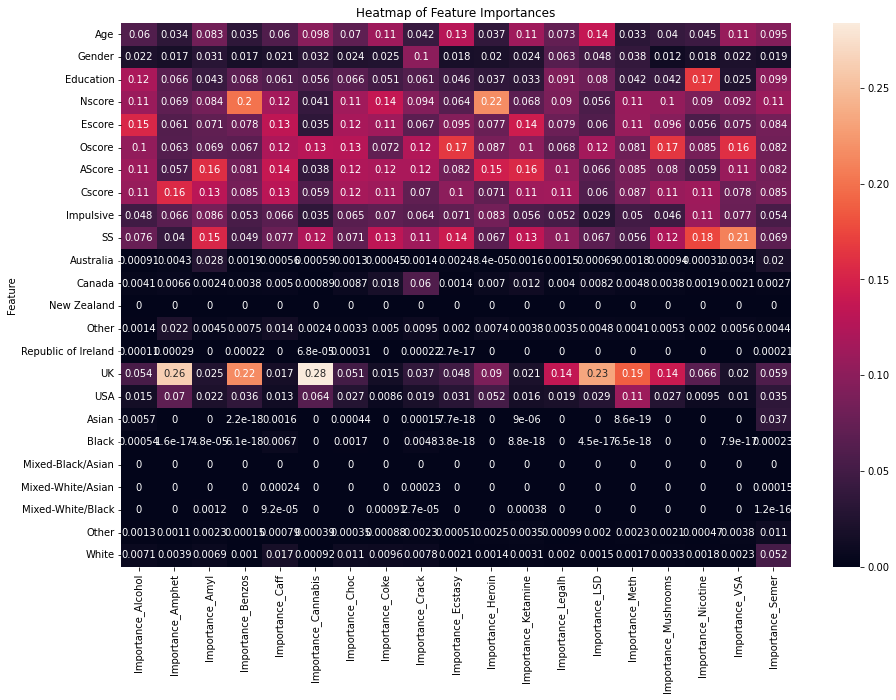

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(Feature_importance,annot=True)
plt.title('Heatmap of Feature Importances')
plt.show()

In [56]:
#As we can see the R-squared scores for most of the drug models are pretty bad. Hence we will now try Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
Scoring = pd.DataFrame(columns=['Drug','Train_score','Test_score'])
Feature_importance = pd.DataFrame(columns=['Feature'])

In [59]:
def build_model(drug):
    X = Drugs_Prediction.drop(drugs,axis=1)
    y = Drugs_Prediction[drug]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)
    
    Model = GradientBoostingClassifier(random_state=100)
    
    params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5],
          'min_samples_leaf':[10,30,50,70,90],
          'max_depth':[5,10,15,20,25,30],
          'max_features':[0.1,0.2,0.3,0.4,0.5,0.6]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train_score'+' '+'='+' '+str(accuracy_score(y_train,y_train_pred)))
    print('Test_score'+' '+'='+' '+str(accuracy_score(y_test,y_test_pred)))
    
    Feature_importance['Feature'] = X_train.columns
    Feature_importance['Importance_'+drug] = Model_best.feature_importances_

In [60]:
for drug in drugs:
    build_model(drug)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.7704047777040478
Test_score = 0.6684350132625995
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.9130723291307233
Test_score = 0.9151193633952255
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.5min finished


Train_score = 1.0
Test_score = 0.9920424403183024
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.9090909090909091
Test_score = 0.896551724137931
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.8838752488387525
Test_score = 0.8620689655172413
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.5min finished


Train_score = 0.8128732581287326
Test_score = 0.7506631299734748
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.8108825481088254
Test_score = 0.7639257294429708
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  8.0min finished


Train_score = 1.0
Test_score = 0.9389920424403183
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.7min finished


Train_score = 1.0
Test_score = 0.9973474801061007
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.9588586595885866
Test_score = 0.9496021220159151
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  8.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.9946914399469144
Test_score = 0.986737400530504
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.5min finished


Train_score = 1.0
Test_score = 0.9708222811671088
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.5min finished


Train_score = 1.0
Test_score = 0.9124668435013262
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.4min finished


Train_score = 1.0
Test_score = 0.9496021220159151
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 590 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1390 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2590 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3340 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4190 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.5min finished


Train_score = 1.0
Test_score = 0.9257294429708223
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  8.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.9774386197743862
Test_score = 0.9761273209549072
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.7020570670205707
Test_score = 0.6312997347480106
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Train_score = 0.9980092899800929
Test_score = 0.9893899204244032
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.5min


Train_score = 1.0
Test_score = 1.0


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.2min finished


In [61]:
Feature_importance.set_index('Feature',inplace=True)
Feature_importance.head()

,Importance_Alcohol,Importance_Amphet,Importance_Amyl,Importance_Benzos,Importance_Caff,Importance_Cannabis,Importance_Choc,Importance_Coke,Importance_Crack,Importance_Ecstasy,Importance_Heroin,Importance_Ketamine,Importance_Legalh,Importance_LSD,Importance_Meth,Importance_Mushrooms,Importance_Nicotine,Importance_VSA,Importance_Semer
Feature,,,,,,,,,,,,,,,,,,,
Age,0.065146,0.055205,0.062467,0.050164,0.087731,0.136471,0.065706,0.069977,0.053484,0.088689,0.045878,0.057038,0.057641,0.087610,0.050439,0.047037,0.054138,0.059947,0.020319
Gender,0.026828,0.024458,0.010959,0.011069,0.015341,0.065057,0.026926,0.038001,0.043391,0.011602,0.028794,0.017430,0.035383,0.020709,0.020433,0.018127,0.038245,0.015929,0.021556
Education,0.149035,0.067513,0.030662,0.073904,0.045801,0.090045,0.080441,0.051581,0.040267,0.069664,0.072672,0.039130,0.064744,0.044055,0.064643,0.035027,0.158114,0.054304,0.027051
Nscore,0.094166,0.069127,0.158784,0.258358,0.097999,0.033882,0.087738,0.174692,0.081259,0.074013,0.131813,0.093288,0.159830,0.151109,0.127520,0.086630,0.077739,0.134241,0.084038
Escore,0.155951,0.048460,0.073875,0.121947,0.126627,0.027148,0.105123,0.096373,0.071391,0.122433,0.108360,0.178897,0.127068,0.172805,0.166483,0.148964,0.037934,0.127739,0.099358


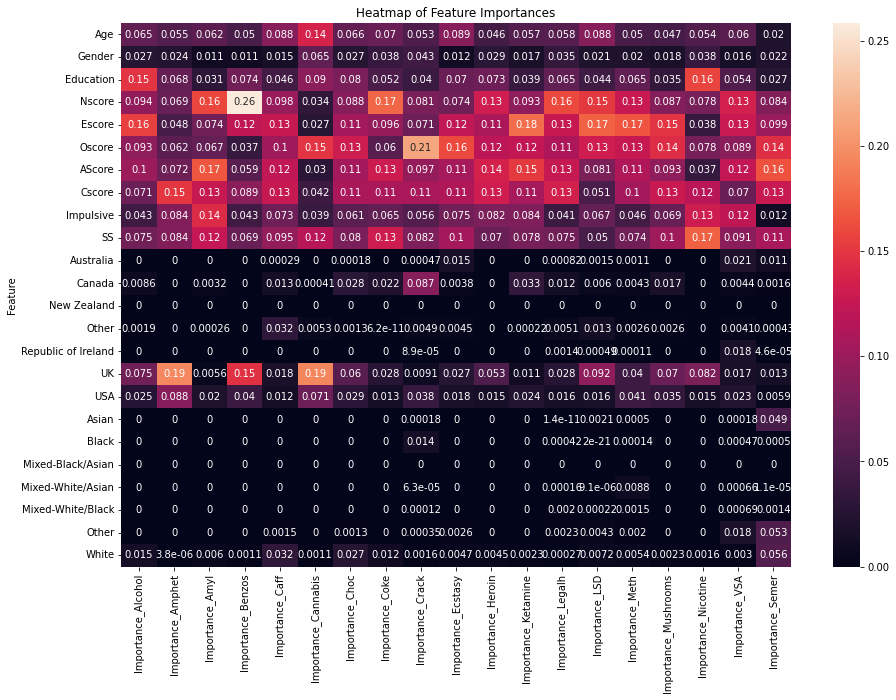

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(Feature_importance,annot=True)
plt.title('Heatmap of Feature Importances')
plt.show()

In [63]:
#There arent too many improvements using gradient boosting. 

In [64]:
#We will now try to cluster the drugs based on their correlations with the Personality score variables. 

In [65]:
Drugs.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,1,9,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0.666667,0.0,0.333333,0.000000,0.333333,0.5,0.000000,0.666667,0.0,0.0
1,3,1,6,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.0,0.0
2,1,0,8,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0.000000,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.333333,0.0,0.0
3,3,0,9,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0.166667,0.0,0.000000,0.166667,0.000000,0.0,0.333333,0.333333,0.0,0.0
4,6,0,4,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0


In [66]:
temp = pd.get_dummies(Drugs['Country'],drop_first=False)
Drugs = pd.concat([Drugs,temp],axis=1)
Drugs.drop('Country',axis=1,inplace=True)

temp = pd.get_dummies(Drugs['Ethnicity'],drop_first=False)
Drugs = pd.concat([Drugs,temp],axis=1)
Drugs.drop('Ethnicity',axis=1,inplace=True)

In [67]:
Drugs.head()

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,Republic of Ireland,UK,USA,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White
0,2,1,9,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,0,1,0,0,0,0,0,0,0,1
1,3,1,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,0,1,0,0,0,0,0,0,0,1
2,1,0,8,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,0,1,0,0,0,0,0,0,0,1
3,3,0,9,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,0,1,0,0,0,0,0,0,0,1
4,6,0,4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,...,0,0,0,0,0,0,0,0,0,1


In [68]:
Drugs_Correlations = Drugs.corr()
Drugs_Correlations = Drugs_Correlations.loc['Alcohol':'VSA']
Drugs_Correlations.drop(drugs,axis=1,inplace=True)
Drugs_Correlations.head()

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,Republic of Ireland,UK,USA,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White
Alcohol,-0.030361,0.002684,0.129190,-0.001927,0.092397,0.032800,-0.021677,-0.000202,0.046007,0.108695,...,-0.037724,0.091341,-0.057313,-0.172614,-0.063673,-0.009044,0.019707,0.020634,-0.022164,0.101991
Amphet,-0.245679,0.222704,-0.138142,0.131067,-0.040987,0.221259,-0.148726,-0.236242,0.289499,0.331489,...,0.044126,-0.396831,0.345968,-0.048077,-0.079918,-0.030010,0.031381,0.017991,0.073772,-0.003380
Amyl,-0.105550,0.162004,-0.002673,0.033416,0.030029,0.060345,-0.096366,-0.117815,0.126205,0.195004,...,0.043101,0.064890,-0.127037,-0.046124,-0.076192,-0.022789,-0.037627,0.013899,0.015940,0.055884
Benzos,-0.127892,0.133908,-0.125771,0.272186,-0.103366,0.201446,-0.164413,-0.206386,0.223418,0.248193,...,0.004717,-0.383671,0.371896,-0.036767,-0.072253,0.032831,0.051681,0.018586,0.077014,-0.029994
Caff,0.035496,0.011445,0.035385,0.012956,0.054492,0.027452,-0.015968,-0.027744,0.049449,0.052374,...,0.034056,0.009256,0.014261,-0.059484,-0.134160,-0.005382,0.013406,-0.007764,-0.017121,0.096798


In [69]:
Drugs_Correlations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Alcohol to VSA
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  19 non-null     float64
 1   Gender               19 non-null     float64
 2   Education            19 non-null     float64
 3   Nscore               19 non-null     float64
 4   Escore               19 non-null     float64
 5   Oscore               19 non-null     float64
 6   AScore               19 non-null     float64
 7   Cscore               19 non-null     float64
 8   Impulsive            19 non-null     float64
 9   SS                   19 non-null     float64
 10  Australia            19 non-null     float64
 11  Canada               19 non-null     float64
 12  New Zealand          19 non-null     float64
 13  Other                19 non-null     float64
 14  Republic of Ireland  19 non-null     float64
 15  UK                   19 non-null     flo

In [70]:
#Now that we have the datafame of correlations we can go ahed with the clustering based on them. 

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
col = Drugs_Correlations.columns
scaler = StandardScaler()
Drugs_Correlations_clust = scaler.fit_transform(Drugs_Correlations)
Drugs_Correlations_clust = pd.DataFrame(Drugs_Correlations,columns=col)
Drugs_Correlations_clust.head()

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,Republic of Ireland,UK,USA,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White
Alcohol,-0.030361,0.002684,0.129190,-0.001927,0.092397,0.032800,-0.021677,-0.000202,0.046007,0.108695,...,-0.037724,0.091341,-0.057313,-0.172614,-0.063673,-0.009044,0.019707,0.020634,-0.022164,0.101991
Amphet,-0.245679,0.222704,-0.138142,0.131067,-0.040987,0.221259,-0.148726,-0.236242,0.289499,0.331489,...,0.044126,-0.396831,0.345968,-0.048077,-0.079918,-0.030010,0.031381,0.017991,0.073772,-0.003380
Amyl,-0.105550,0.162004,-0.002673,0.033416,0.030029,0.060345,-0.096366,-0.117815,0.126205,0.195004,...,0.043101,0.064890,-0.127037,-0.046124,-0.076192,-0.022789,-0.037627,0.013899,0.015940,0.055884
Benzos,-0.127892,0.133908,-0.125771,0.272186,-0.103366,0.201446,-0.164413,-0.206386,0.223418,0.248193,...,0.004717,-0.383671,0.371896,-0.036767,-0.072253,0.032831,0.051681,0.018586,0.077014,-0.029994
Caff,0.035496,0.011445,0.035385,0.012956,0.054492,0.027452,-0.015968,-0.027744,0.049449,0.052374,...,0.034056,0.009256,0.014261,-0.059484,-0.134160,-0.005382,0.013406,-0.007764,-0.017121,0.096798


In [73]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [74]:
hopkins(Drugs_Correlations_clust)

0.5903168641615755

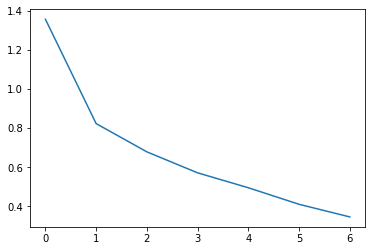

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Drugs_Correlations_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [76]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Drugs_Correlations_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Drugs_Correlations_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5286457908399352
For n_clusters=3, the silhouette score is 0.39568294746589505
For n_clusters=4, the silhouette score is 0.32109680862680995
For n_clusters=5, the silhouette score is 0.247875964711589
For n_clusters=6, the silhouette score is 0.222209470469537
For n_clusters=7, the silhouette score is 0.20945342341782747
For n_clusters=8, the silhouette score is 0.19761495043686353


In [77]:
#Clustering the drugs inro 3 clusters

In [78]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Drugs_Correlations_clust)

KMeans(max_iter=100, n_clusters=3)

In [79]:
Drugs_Correlations['Cluster_ID'] = kmeans.labels_
Drugs_Correlations.head()

,Age,Gender,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,...,UK,USA,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White,Cluster_ID
Alcohol,-0.030361,0.002684,0.129190,-0.001927,0.092397,0.032800,-0.021677,-0.000202,0.046007,0.108695,...,0.091341,-0.057313,-0.172614,-0.063673,-0.009044,0.019707,0.020634,-0.022164,0.101991,0
Amphet,-0.245679,0.222704,-0.138142,0.131067,-0.040987,0.221259,-0.148726,-0.236242,0.289499,0.331489,...,-0.396831,0.345968,-0.048077,-0.079918,-0.030010,0.031381,0.017991,0.073772,-0.003380,1
Amyl,-0.105550,0.162004,-0.002673,0.033416,0.030029,0.060345,-0.096366,-0.117815,0.126205,0.195004,...,0.064890,-0.127037,-0.046124,-0.076192,-0.022789,-0.037627,0.013899,0.015940,0.055884,0
Benzos,-0.127892,0.133908,-0.125771,0.272186,-0.103366,0.201446,-0.164413,-0.206386,0.223418,0.248193,...,-0.383671,0.371896,-0.036767,-0.072253,0.032831,0.051681,0.018586,0.077014,-0.029994,1
Caff,0.035496,0.011445,0.035385,0.012956,0.054492,0.027452,-0.015968,-0.027744,0.049449,0.052374,...,0.009256,0.014261,-0.059484,-0.134160,-0.005382,0.013406,-0.007764,-0.017121,0.096798,0


In [80]:
#Plotting the Clusters

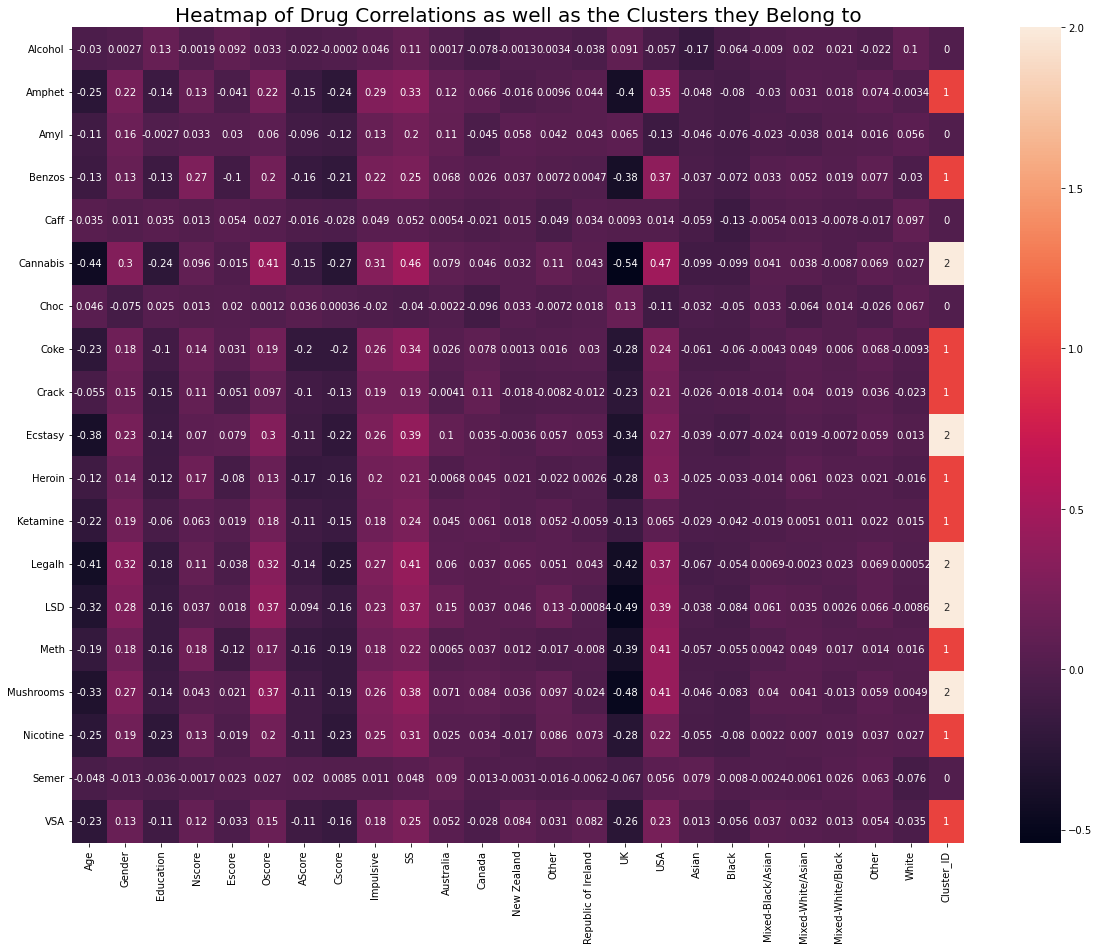

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(Drugs_Correlations,annot=True)
plt.title('Heatmap of Drug Correlations as well as the Clusters they Belong to',fontsize=20)
plt.show()

In [82]:
#Printing the Clusters

In [83]:
print('Cluster 1 :', list(Drugs_Correlations[Drugs_Correlations.Cluster_ID == 0].index))
print('Cluster 2 :', list(Drugs_Correlations[Drugs_Correlations.Cluster_ID == 1].index))
print('Cluster 3 :', list(Drugs_Correlations[Drugs_Correlations.Cluster_ID == 2].index))

Cluster 1 : ['Alcohol', 'Amyl', 'Caff', 'Choc', 'Semer']
Cluster 2 : ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin', 'Ketamine', 'Meth', 'Nicotine', 'VSA']
Cluster 3 : ['Cannabis', 'Ecstasy', 'Legalh', 'LSD', 'Mushrooms']


In [84]:
#Now we will again cluster the drugs based solely on their correlations with the Personality type variables.

In [85]:
Drugs_Correlations = Drugs_Correlations[['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]
Drugs_Correlations.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
Alcohol,-0.001927,0.092397,0.032800,-0.021677,-0.000202,0.046007,0.108695
Amphet,0.131067,-0.040987,0.221259,-0.148726,-0.236242,0.289499,0.331489
Amyl,0.033416,0.030029,0.060345,-0.096366,-0.117815,0.126205,0.195004
Benzos,0.272186,-0.103366,0.201446,-0.164413,-0.206386,0.223418,0.248193
Caff,0.012956,0.054492,0.027452,-0.015968,-0.027744,0.049449,0.052374


In [86]:
col = Drugs_Correlations.columns
scaler = StandardScaler()
Drugs_Correlations_clust = scaler.fit_transform(Drugs_Correlations)
Drugs_Correlations_clust = pd.DataFrame(Drugs_Correlations,columns=col)
Drugs_Correlations_clust.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
Alcohol,-0.001927,0.092397,0.032800,-0.021677,-0.000202,0.046007,0.108695
Amphet,0.131067,-0.040987,0.221259,-0.148726,-0.236242,0.289499,0.331489
Amyl,0.033416,0.030029,0.060345,-0.096366,-0.117815,0.126205,0.195004
Benzos,0.272186,-0.103366,0.201446,-0.164413,-0.206386,0.223418,0.248193
Caff,0.012956,0.054492,0.027452,-0.015968,-0.027744,0.049449,0.052374


In [87]:
hopkins(Drugs_Correlations_clust)

0.7455949800217901

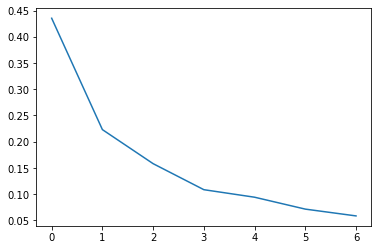

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Drugs_Correlations_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [89]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Drugs_Correlations_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Drugs_Correlations_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5294865586406408
For n_clusters=3, the silhouette score is 0.46525924981108124
For n_clusters=4, the silhouette score is 0.40070419111769917
For n_clusters=5, the silhouette score is 0.42744674201805866
For n_clusters=6, the silhouette score is 0.42977700789161194
For n_clusters=7, the silhouette score is 0.36964320164420955
For n_clusters=8, the silhouette score is 0.3142047867417335


In [90]:
#Clustering the drugs into 3 clusters based on the personality variables. 

In [91]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Drugs_Correlations_clust)

KMeans(max_iter=100, n_clusters=3)

In [92]:
Drugs_Correlations['Cluster_ID'] = kmeans.labels_
Drugs_Correlations.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Cluster_ID
Alcohol,-0.001927,0.092397,0.032800,-0.021677,-0.000202,0.046007,0.108695,1
Amphet,0.131067,-0.040987,0.221259,-0.148726,-0.236242,0.289499,0.331489,2
Amyl,0.033416,0.030029,0.060345,-0.096366,-0.117815,0.126205,0.195004,1
Benzos,0.272186,-0.103366,0.201446,-0.164413,-0.206386,0.223418,0.248193,2
Caff,0.012956,0.054492,0.027452,-0.015968,-0.027744,0.049449,0.052374,1


In [93]:
#Plotting the Clusters

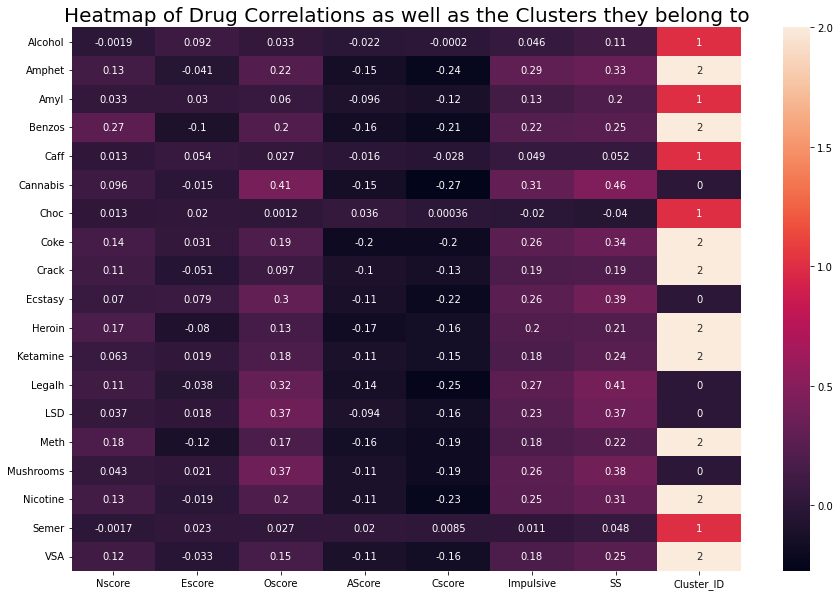

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(Drugs_Correlations,annot=True)
plt.title('Heatmap of Drug Correlations as well as the Clusters they belong to',fontsize=20)
plt.show()

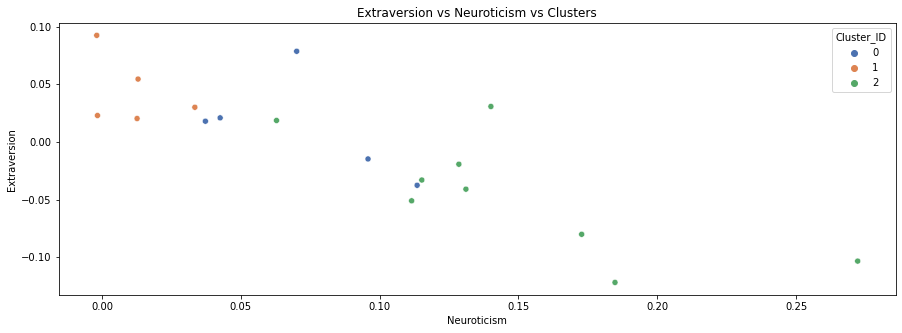

In [95]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Nscore',y='Escore',data=Drugs_Correlations,hue='Cluster_ID',palette='deep')
plt.title('Extraversion vs Neuroticism vs Clusters')
plt.xlabel('Neuroticism')
plt.ylabel('Extraversion')
plt.show()

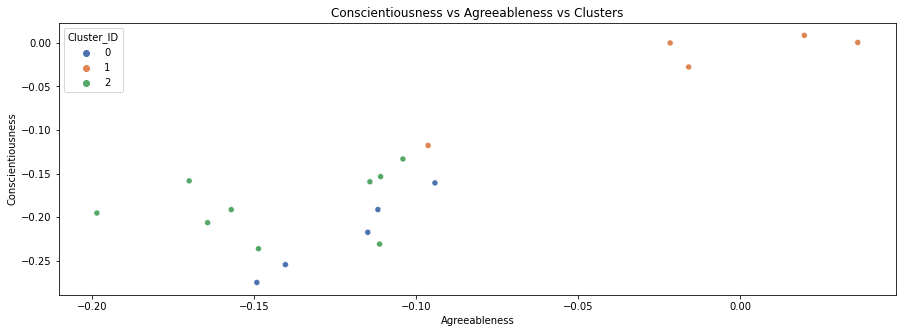

In [96]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='AScore',y='Cscore',data=Drugs_Correlations,hue='Cluster_ID',palette='deep')
plt.title('Conscientiousness vs Agreeableness vs Clusters')
plt.xlabel('Agreeableness')
plt.ylabel('Conscientiousness')
plt.show()

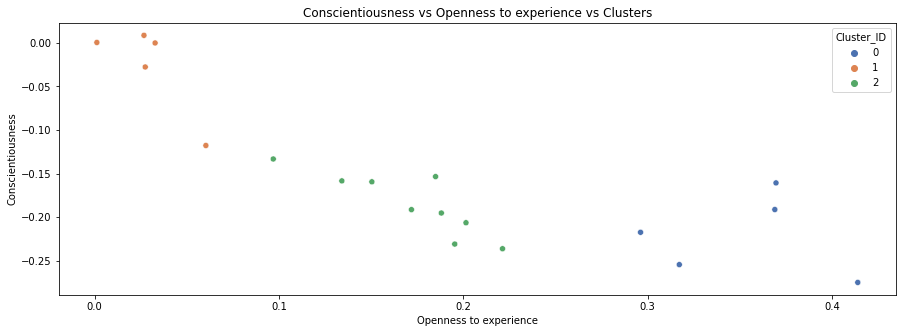

In [97]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Oscore',y='Cscore',data=Drugs_Correlations,hue='Cluster_ID',palette='deep')
plt.title('Conscientiousness vs Openness to experience vs Clusters')
plt.xlabel('Openness to experience')
plt.ylabel('Conscientiousness')
plt.show()

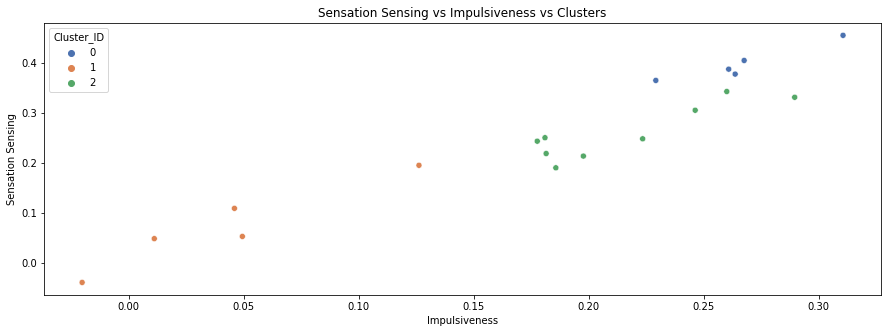

In [98]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Impulsive',y='SS',data=Drugs_Correlations,hue='Cluster_ID',palette='deep')
plt.title('Sensation Sensing vs Impulsiveness vs Clusters')
plt.xlabel('Impulsiveness')
plt.ylabel('Sensation Sensing')
plt.show()

In [99]:
#Printing the Clusters

In [100]:
print('Cluster 1 :', list(Drugs_Correlations[Drugs_Correlations.Cluster_ID == 0].index))
print('Cluster 2 :', list(Drugs_Correlations[Drugs_Correlations.Cluster_ID == 1].index))
print('Cluster 3 :', list(Drugs_Correlations[Drugs_Correlations.Cluster_ID == 2].index))

Cluster 1 : ['Cannabis', 'Ecstasy', 'Legalh', 'LSD', 'Mushrooms']
Cluster 2 : ['Alcohol', 'Amyl', 'Caff', 'Choc', 'Semer']
Cluster 3 : ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin', 'Ketamine', 'Meth', 'Nicotine', 'VSA']


In [101]:
#As we can see from the plots we get pretty well defined clusters.

In [102]:
# END FOR NOW #